In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats 
import scipy.special as sc
import math
from scipy.optimize import curve_fit  
from matplotlib import pyplot as plt

In [2]:
import pylab
params = {'backend': 'ps',
          'axes.labelsize': 47.5,
          'legend.fontsize': 47.5,
          'legend.handlelength': 2.0,
          'legend.borderaxespad': 0,
          'xtick.labelsize': 47.5,
          'ytick.labelsize': 47.5,
          'font.family': 'serif',
          'font.size': 47.5,
          'font.weight': 'normal',
          #'font.serif': ['Palatino'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': False}
pylab.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

# Homogeneous vs heterogeneous respiration for scenario 1

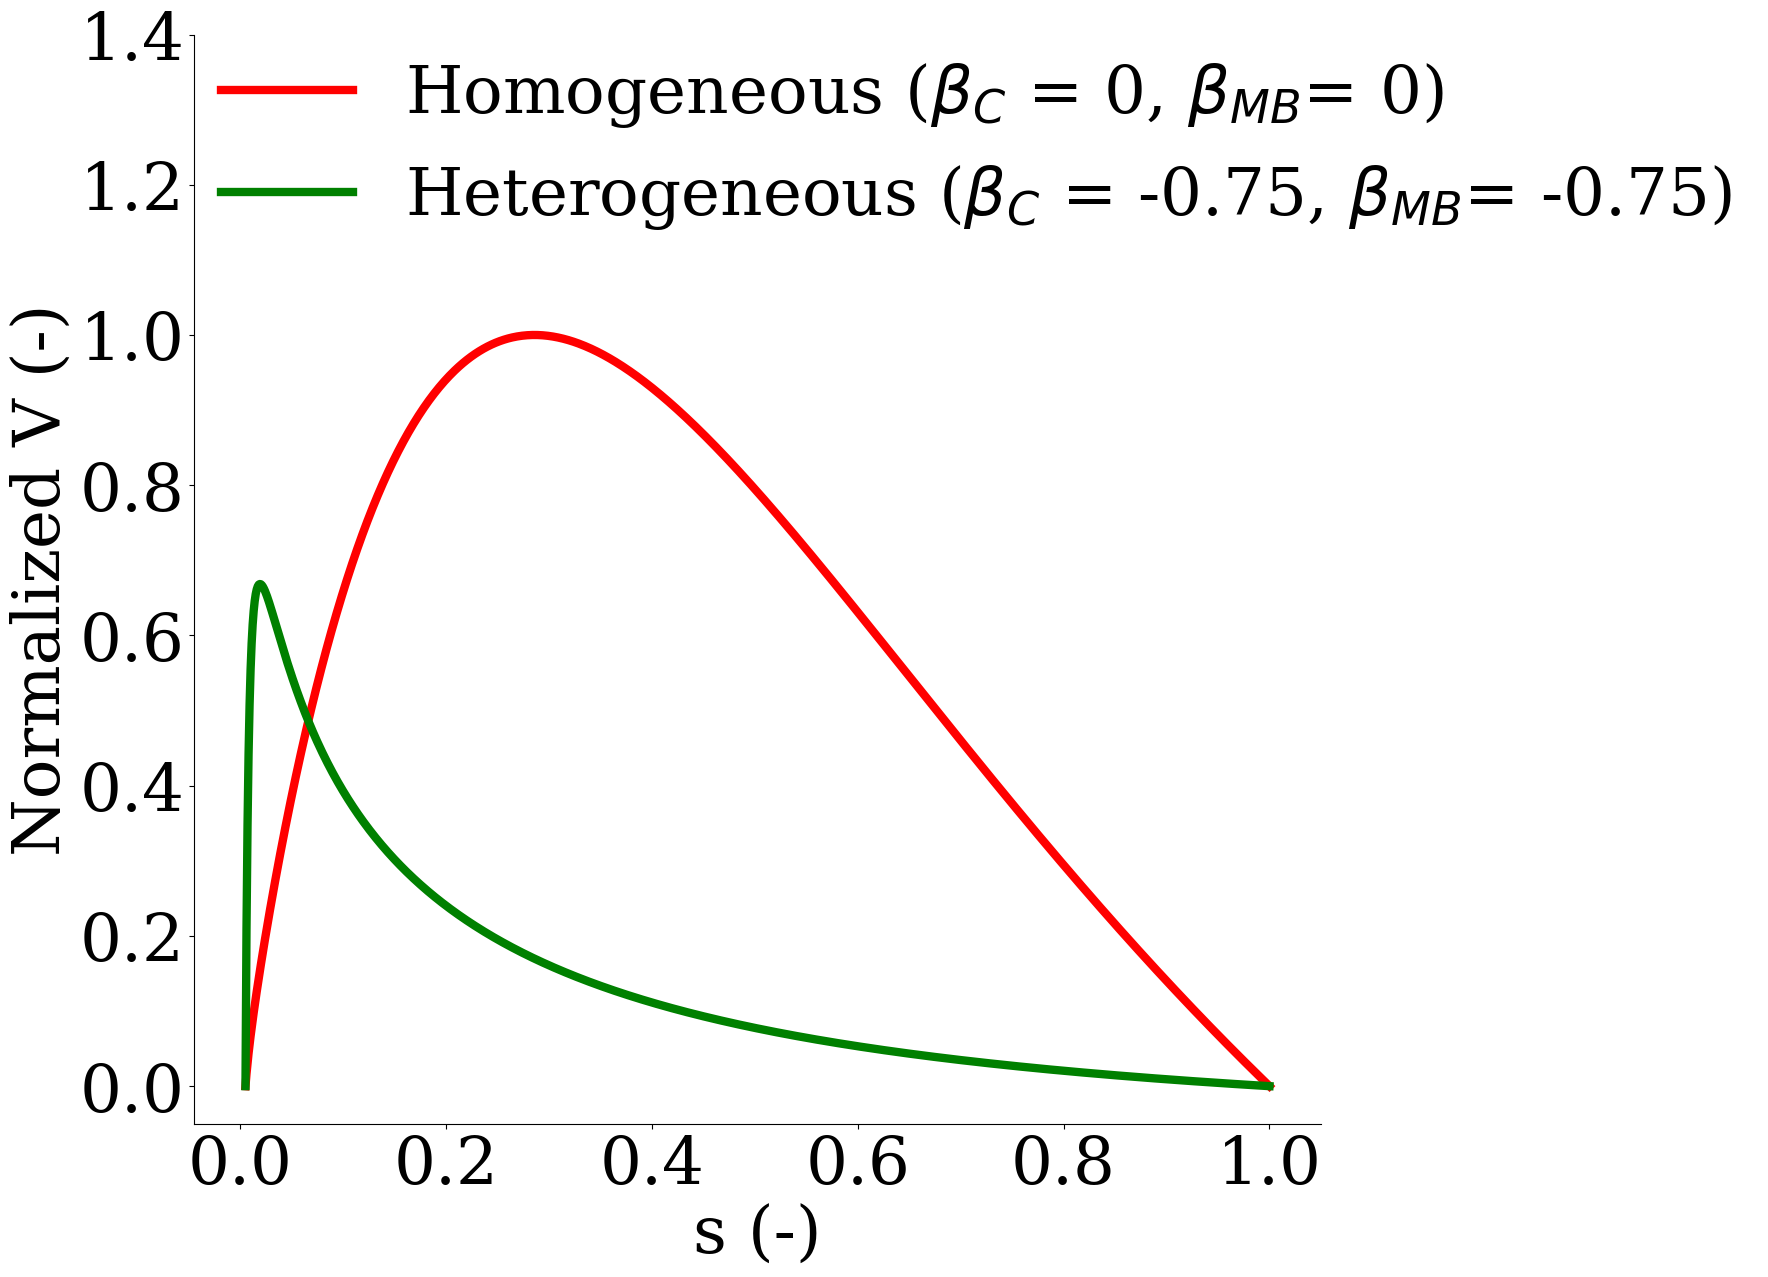

In [3]:
fig = plt.figure(figsize=(17,14))
ax1 = fig.add_subplot(111) 

## Dw and Do coefficients for oxygen availability equation
Dw = 2.1*10**(-9) #m^2 s^-1 unit obtained from yan et al.
Do = 2.1*10**(-5) #m^2 s^-1 unit obtained from yan et al.

## Here we used the Ra_w = F^-1(s); where F is the CDF obtain the moisture-respiration curve for different heterogeneity scenarios. 
## Based on the Ra_w = F^-1(s) we obtain a relationship of Ra_w = 0.01*s for values of Ra_w commonly used in literature. 
s = np.linspace(0.0053,1,1000)
s_max = 1
## Equation of available oxygen
o = np.exp(-Do)*((0.01*s_max)-(0.01*s))

## Homogeneous case (beta_C and beta_MB = 0) for scenario 1
y1 = stats.gamma.cdf(s, a=2, scale=0.29) #(normal Gamma dist; a is alpha and scale is beta of homo. v)
y2 = stats.gamma.cdf(0.0053, a=2, scale=0.29) #(Gamma dist at the starting s value; a is alpha and scale is beta of homo. v)
y3 = stats.gamma.cdf(1, a=2, scale=0.29) #(Gamma dist at the end s value; a is alpha and scale is beta of homo. v)
c = (y1-y2)/(y3-y2) #CDF of a truncated distribution of homogeneous v

## Respiration rate equation
v_avg = o* np.exp(-Dw*(0.01*s))*(1/(0.01*s))*c

##Estimating the maximum respiration rate
v_avgg = max(v_avg)

##Normalizing homogeneous respiration rate with maximum respiration rate
yy = v_avg/v_avgg

ax1.plot(s,yy,color='red',linewidth = 6, label=r'Homogeneous ($\beta_C$ = 0, $\beta_{MB}$= 0)')


# Heterogeneous scenario with both beta_c and beta_b -ve for scenario 1
beta_c = -0.75     #beta c value
beta_b = -0.75     #beta b value

y11 = stats.gamma.cdf(s, a=0.5, scale=0.29) #(normal Gamma dist; a is alpha and scale is beta of hetero. v)
y22 = stats.gamma.cdf(0.0053, a=0.5, scale=0.29) #(Gamma dist at the starting s value; a is alpha and scale is beta of hetero. v)
y33 = stats.gamma.cdf(1, a=0.5, scale=0.29) #(Gamma dist at the end s value; a is alpha and scale is beta of hetero. v)
cc = (y11-y22)/(y33-y22) #CDF of a truncated distribution of heterogeneous v

## Heterogeneous respiration rate equation
v_avgg1 = o* np.exp(-Dw*(0.01*s))*(1/(0.01*s))*cc*(beta_c+1)/(s_max**beta_c)*(beta_b+1)/(s_max**beta_b)

##Normalizing heterogeneous respiration rate with maximum homogeneous respiration rate
yyy = v_avgg1/v_avgg

ax1.plot(s,yyy,color='green',linewidth = 6,label=r'Heterogeneous ($\beta_C$ = -0.75, $\beta_{MB}$= -0.75)')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel(r's (-)')
ax1.set_ylabel(r'Normalized V (-)')
plt.xticks(np.arange(0.0, 1.2, 0.2))
plt.yticks(np.arange(0, 1.6, 0.2))
ax1.legend(frameon=False, loc="upper left")
plt.tight_layout()


# Homogeneous vs heterogeneous respiration for scenario 2

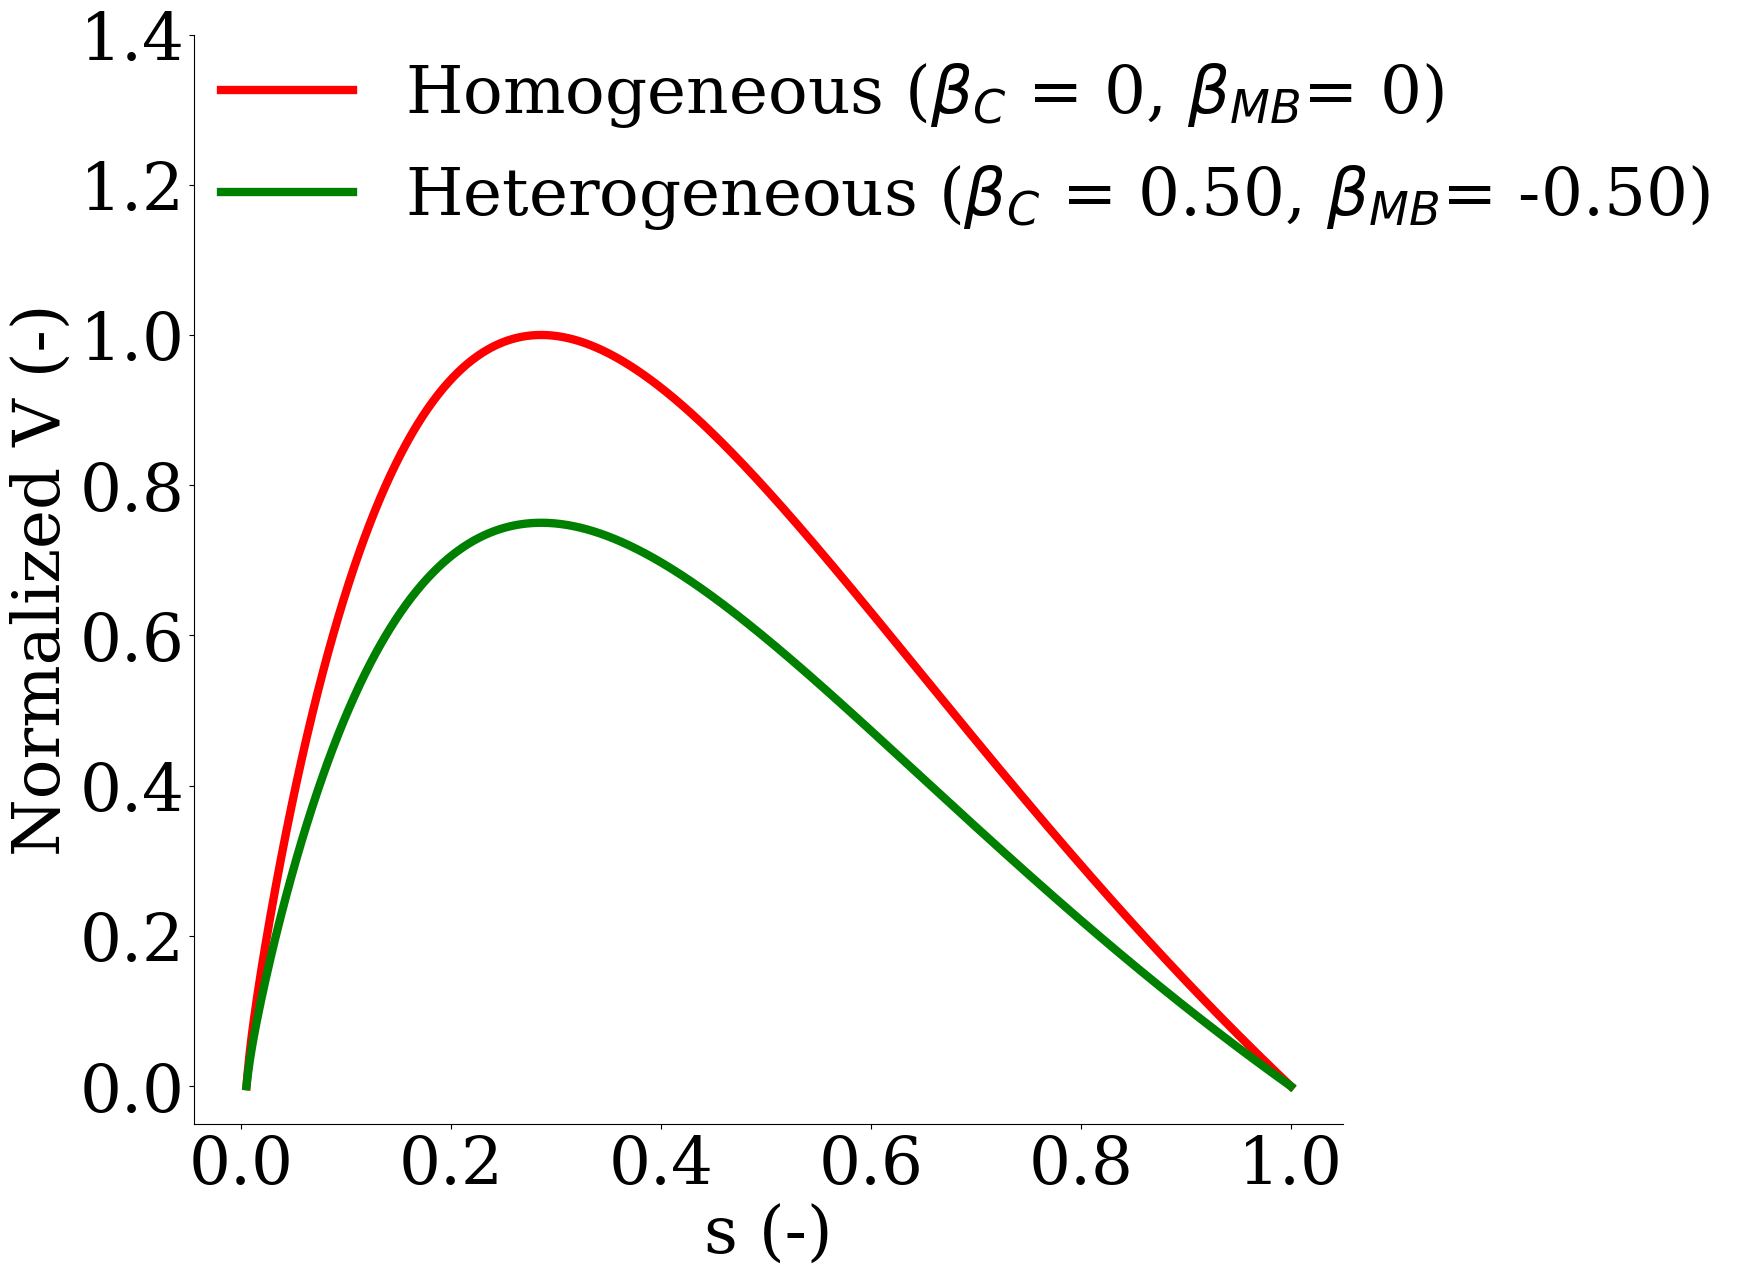

In [4]:
fig = plt.figure(figsize=(17,14))
ax2 = fig.add_subplot(111) 

## Dw and Do coefficients for oxygen availability equation
Dw = 2.1*10**(-9) #m^2 s^-1 unit obtained from yan et al.
Do = 2.1*10**(-5) #m^2 s^-1 unit obtained from yan et al.

## Here we used the Ra_w = F^-1(s); where F is the CDF obtain the moisture-respiration curve for different heterogeneity scenarios. 
## Based on the Ra_w = F^-1(s) we obtain a relationship of Ra_w = 0.01*s for values of Ra_w commonly used in literature. 
s = np.linspace(0.0053,1,1000)
s_max = 1
## Equation of available oxygen
o = np.exp(-Do)*((0.01*s_max)-(0.01*s))


## Homogeneous case (beta_C and beta_MB = 0) for scenario 2

y1 = stats.gamma.cdf(s, a=2, scale=0.29) #(normal Gamma dist; a is alpha and scale is beta of v)
y2 = stats.gamma.cdf(0.0053, a=2, scale=0.29) #(Gamma dist at the starting s value; a is alpha and scale is beta of v)
y3 = stats.gamma.cdf(1, a=2, scale=0.29) #(Gamma dist at the end s value; a is alpha and scale is beta of v)
c = (y1-y2)/(y3-y2) #CDF of a truncated distribution of homogeneous v

## Respiration rate equation
v_avg = o* np.exp(-Dw*(0.01*s))*(1/(0.01*s))*c

##Estimating maximum homogeneous respiration rate
v_avgg = max(v_avg)

##Normalizing homogeneous respiration rate with maximum respiration rate
yy = v_avg/v_avgg
ax2.plot(s,yy,color='red', linewidth = 6, label=r'Homogeneous ($\beta_C$ = 0, $\beta_{MB}$= 0)')


# Heterogeneous scenario with beta_c positive and beta_b negative for scenario 2
beta_c = 0.50    #beta c value
beta_b = -0.50    #beta b value


y11 = stats.gamma.cdf(s, a=2, scale=0.29) #(normal Gamma dist; a is alpha and scale is beta of heterogeneous v)
y22 = stats.gamma.cdf(0.0053, a=2, scale=0.29) #(Gamma dist at the starting s value; a is alpha and scale is beta of hetero v)
y33 = stats.gamma.cdf(1, a=2, scale=0.29) #(Gamma dist at the end s value; a is alpha and scale is beta of hetero v)
cc = (y11-y22)/(y33-y22) #CDF of a truncated distribution of heterogeneous respiration

## Heterogeneous respiration rate equation
v_avgg1 = o* np.exp(-Dw*(0.01*s))*(1/(0.01*s))*cc*(beta_c+1)/(s_max**beta_c)*(beta_b+1)/(s_max**beta_b)


##Normalizing heterogeneous respiration rate with maximum homogeneous respiration rate
yyy = v_avgg1/v_avgg

ax2.plot(s,yyy,color='green',linewidth = 6,label=r'Heterogeneous ($\beta_C$ = 0.50, $\beta_{MB}$= -0.50)')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel(r's (-)')
ax2.set_ylabel(r'Normalized V (-)')
ax2.legend(frameon=False, loc="upper left")
plt.xticks(np.arange(0.0, 1.2, 0.2))
plt.yticks(np.arange(0, 1.6, 0.2))
plt.tight_layout()


# Homogeneous vs heterogeneous respiration for scenario 3

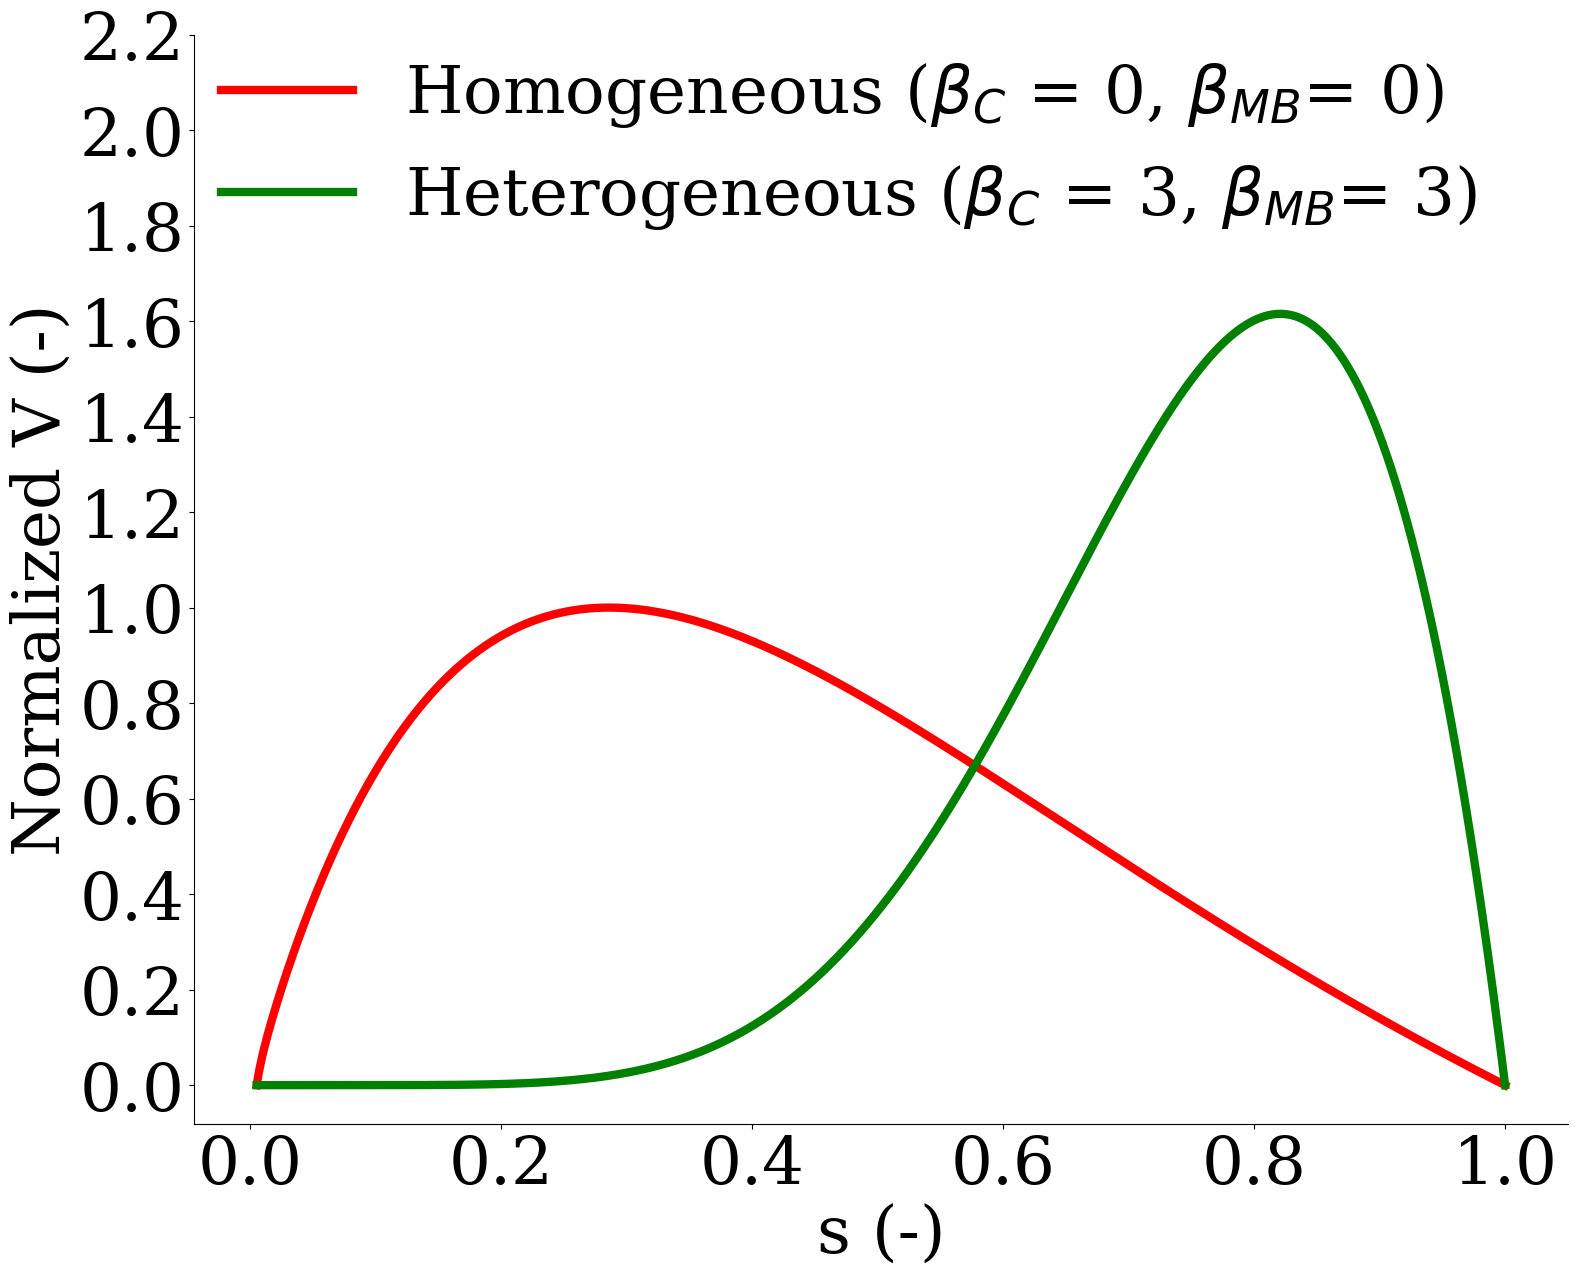

In [5]:
fig = plt.figure(figsize=(17,14))
ax3 = fig.add_subplot(111) 

## Dw and Do coefficients for oxygen availability equation
Dw = 2.1*10**(-9) #m^2 s^-1 unit obtained from yan et al.
Do = 2.1*10**(-5) #m^2 s^-1 unit obtained from yan et al.

## Here we used the Ra_w = F^-1(s); where F is the CDF obtain the moisture-respiration curve for different heterogeneity scenarios. 
## Based on the Ra_w = F^-1(s) we obtain a relationship of Ra_w = 0.01*s for values of Ra_w commonly used in literature. 
s = np.linspace(0.0053,1,1000)
s_max = 1
## Equation of available oxygen
o = np.exp(-Do)*((0.01*s_max)-(0.01*s))


## Homogeneous case (beta_C and beta_MB = 0) for scenario 3
y1 = stats.gamma.cdf(s, a=2, scale=0.29) #(normal Gamma dist; a is alpha and scale is beta of v)
y2 = stats.gamma.cdf(0.0053, a=2, scale=0.29) #(Gamma dist at the starting s value; a is alpha and scale is beta of v)
y3 = stats.gamma.cdf(1, a=2, scale=0.29) #(Gamma dist at the end s value; a is alpha and scale is beta of v)
c = (y1-y2)/(y3-y2) #CDF of a truncated distribution of homogeneous v

## Respiration rate equation
v_avg = o* np.exp(-Dw*(0.01*s))*(1/(0.01*s))*c

##Estimating maximum respiration rate
v_avgg = max(v_avg)

##Normalizing homogeneous respiration rate with maximum respiration rate
yy = v_avg/v_avgg
ax3.plot(s,yy,color='red',linewidth = 6,label= r'Homogeneous ($\beta_C$ = 0, $\beta_{MB}$= 0)')


# Heterogeneous scenario with beta_c positive and beta_b positive
beta_c = 3   #beta c value
beta_b = 3   #beta b value


y11 = stats.gamma.cdf(s, a=8, scale=0.29) #(normal Gamma dist; a is alpha and scale is beta of v)
y22 = stats.gamma.cdf(0.0053, a=8, scale=0.29) #(Gamma dist at the starting radius value; a is alpha and scale is beta of v)
y33 = stats.gamma.cdf(1, a=8, scale=0.29) #(Gamma dist at the end radius value; a is alpha and scale is beta of v)
cc = (y11-y22)/(y33-y22) #CDF of a truncated distribution of heterogeneous v

## Heterogeneous respiration rate equation
v_avgg1 = o* np.exp(-Dw*(0.01*s))*(1/(0.01*s))*cc*(beta_c+1)/(s_max**beta_c)*(beta_b+1)/(s_max**beta_b)

##Normalizing heterogeneous respiration rate with maximum homogeneous respiration rate
yyy = v_avgg1/v_avgg

ax3.plot(s,yyy,color='green',linewidth = 6, label=r'Heterogeneous ($\beta_C$ = 3, $\beta_{MB}$= 3)')

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlabel(r's (-)')
ax3.set_ylabel(r'Normalized V (-)')
ax3.legend(frameon=False, loc="upper left")
plt.yticks(np.arange(0, 0.2, 1))
plt.yticks(np.arange(0, 2.4, 0.2))
plt.tight_layout()